# Time Resampling

In [25]:
import pandas as pd

df = pd.read_csv("starbucks.csv",index_col = "Date")

In [26]:
df.head()

,Close,Volume
Date,,
1992-06-26,0.252696,224358400
1992-06-29,0.270325,58732800
1992-06-30,0.261510,34777600
1992-07-01,0.267387,18316800
1992-07-02,0.267387,13996800


In [24]:
df.shape

(8372, 3)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8372 entries, 1992-06-26 to 2025-09-26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   8372 non-null   float64
 1   Volume  8372 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 196.2+ KB


In [28]:
df.index

Index(['1992-06-26', '1992-06-29', '1992-06-30', '1992-07-01', '1992-07-02',
       '1992-07-06', '1992-07-07', '1992-07-08', '1992-07-09', '1992-07-10',
       ...
       '2025-09-15', '2025-09-16', '2025-09-17', '2025-09-18', '2025-09-19',
       '2025-09-22', '2025-09-23', '2025-09-24', '2025-09-25', '2025-09-26'],
      dtype='object', name='Date', length=8372)

In [30]:
df = pd.read_csv("starbucks.csv",index_col = "Date",parse_dates=True)

In [31]:
df.index

DatetimeIndex(['1992-06-26', '1992-06-29', '1992-06-30', '1992-07-01',
               '1992-07-02', '1992-07-06', '1992-07-07', '1992-07-08',
               '1992-07-09', '1992-07-10',
               ...
               '2025-09-15', '2025-09-16', '2025-09-17', '2025-09-18',
               '2025-09-19', '2025-09-22', '2025-09-23', '2025-09-24',
               '2025-09-25', '2025-09-26'],
              dtype='datetime64[ns]', name='Date', length=8372, freq=None)

# resample()

![Alt text](/home/nilo/projects/Timeseries/resample_rules.jpeg)

In [34]:
df = df[df.index >= "2015-01-01"]

In [36]:
df

,Close,Volume
Date,,
2015-01-02,32.895290,6886000
2015-01-05,32.265186,11623800
2015-01-06,32.002632,7664400
2015-01-07,32.790276,9732600
2015-01-08,33.319416,13170600
...,...,...
2025-09-22,85.290001,7881700
2025-09-23,85.690002,8765500
2025-09-24,84.269997,9664000


In [ ]:
# Average closing price per year
df.resample(rule="A").mean()   #min, max, sum, std

/tmp/ipykernel_19852/1703398618.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule="A").mean()


,Close,Volume
Date,,
2015-12-31,43.344098,8.648356e+06
2016-12-31,46.644715,9.300222e+06
2017-12-31,47.999726,9.295893e+06
2018-12-31,49.222424,1.122824e+07
2019-12-31,71.230298,7.996700e+06
2020-12-31,73.893579,9.634834e+06
2021-12-31,101.709085,6.095756e+06
2022-12-31,81.150594,8.771831e+06
2023-12-31,95.405969,6.561352e+06


In [38]:
#custom resampling rule

def fist_day(entry):
    if len(entry) != 0:
        return entry[0]
df.resample(rule="A").apply(fist_day)

/tmp/ipykernel_19852/3058367082.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule="A").apply(fist_day)
/tmp/ipykernel_19852/3058367082.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return entry[0]


,Close,Volume
Date,,
2015-12-31,32.895290,6886000
2016-12-31,47.671406,13521500
2017-12-31,45.968033,7809300
2018-12-31,48.750107,7216000
2019-12-31,55.670593,10094000
2020-12-31,78.786842,6473800
2021-12-31,92.786278,8041500
2022-12-31,106.743629,5475700
2023-12-31,94.435699,6607700


# Visualization

In [39]:
df

,Close,Volume
Date,,
2015-01-02,32.895290,6886000
2015-01-05,32.265186,11623800
2015-01-06,32.002632,7664400
2015-01-07,32.790276,9732600
2015-01-08,33.319416,13170600
...,...,...
2025-09-22,85.290001,7881700
2025-09-23,85.690002,8765500
2025-09-24,84.269997,9664000


/tmp/ipykernel_19852/3405286861.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df['Close'].resample('A').mean().plot.bar()


<Axes: xlabel='Date'>

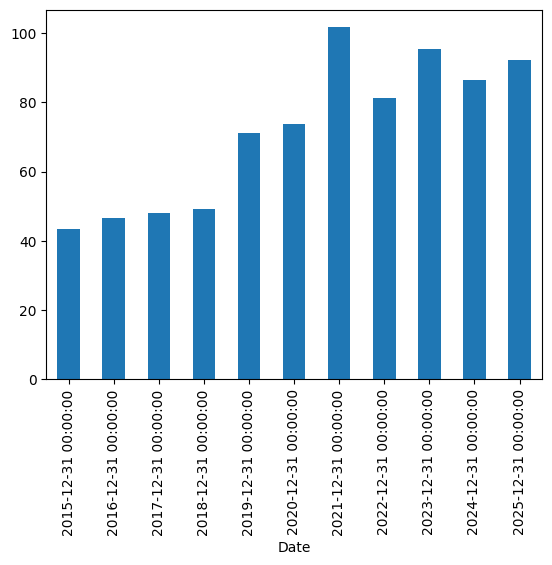

In [44]:
df['Close'].resample('A').mean().plot.bar()

/tmp/ipykernel_19852/2645466835.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Close'].resample('M').max().plot.bar(title=title,figsize=(20,6))


<Axes: title={'center': 'Monthly Average Closing Price of Starbucks'}, xlabel='Date'>

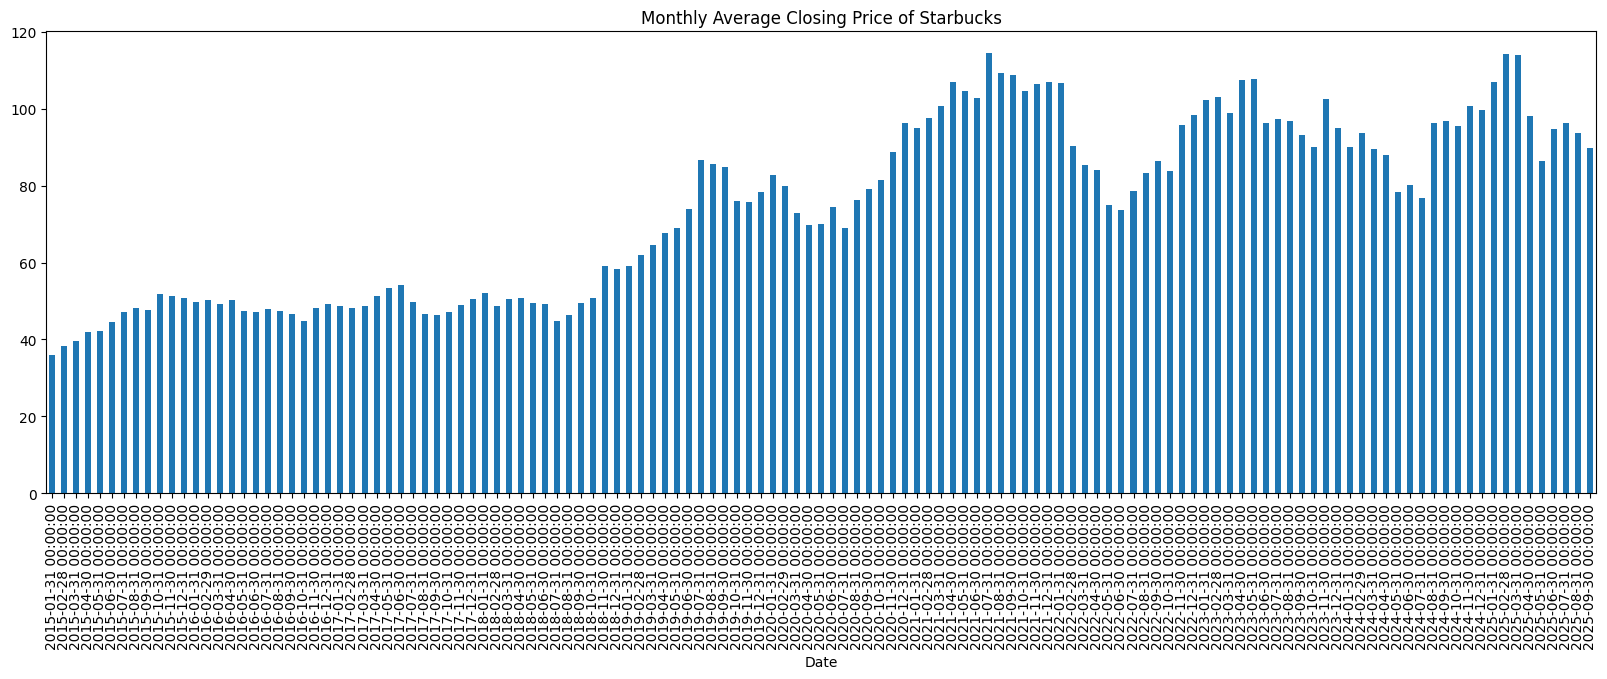

In [49]:
title = "Monthly Average Closing Price of Starbucks"
df['Close'].resample('M').max().plot.bar(title=title,figsize=(20,6))